# Final Project 1 - Logistic Regression

Created by : Kelompok - 09  
Class : PYTN-KS18


Member 1 : Vincent Tanaka - PYTN-KS18-013  
Member 2 : Audris Vondrea - PYTN-KS18-0

## a. Introduction

*Project* ini akan membahas mengenai penggunaan algoritma *Machine Learning Linear Regression* pada *dataset* https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma mengenai *Uber and Lyft Dataset Boston, MA.*  
Dataset *Uber* and *Lyft* di *Boston*, MA, berisi informasi mengenai layanan rideshare di daerah Boston. Dataset ini mencakup sejumlah besar data transaksi rideshare yang melibatkan perusahaan Uber dan Lyft. Variabel-variabel dalam dataset ini mencakup informasi tentang waktu pemesanan, titik awal dan tujuan perjalanan, serta biaya yang terkait dengan setiap transaksi. Dataset ini memberikan gambaran luas tentang aktivitas *rideshare* di kota *Boston*, dan dapat digunakan untuk analisis dan pemodelan terkait mobilitas perkotaan dan preferensi pengguna terhadap layanan rideshare.  
Pertama-tama project ini akan dimulai dengan meng*import dataset* dan melihat kolom-kolom yang ada didalamnya.

## b. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error

import joblib

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

#Set Project Directory
project_directory = 'D:/College/Hacktiv8FinalProject/Final Project 1'

## c. Data Loading / Simple Data Exploration

Disini dataframe akan dicek secara sederhana. Seperti jumlah row dan column, tipe data tiap kolom, dan lain-lain.

In [2]:
#Specify File Path
compressed_file_path = 'UberLyftDataset.zip'
# Read the compressed CSV file 
df = pd.read_csv(compressed_file_path, compression='zip')

In [3]:
# Show top 10 row of dataframe
df.head(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607.89,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.00,42.21,-71.03,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.00,0.00,0.68,8.66,9.17,1545015600,10.00,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.00,303.80,1544962084,1544994864,0.30,0.13,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023.68,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.00,42.21,-71.03,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.13,1.00,0.94,11.98,11.98,1543291200,4.79,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.79,291.10,1543232969,1543266992,0.64,0.13,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822.20,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.00,42.21,-71.03,38.33,32.93,Clear,Light rain in the morning.,0.00,0.00,0.75,7.33,7.33,1543334400,10.00,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.00,315.70,1543319437,1543353364,0.68,0.11,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582.75,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.44,1.00,42.21,-71.03,34.38,29.63,Clear,Partly cloudy throughout the day.,0.00,0.00,0.73,5.28,5.28,1543514400,10.00,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.00,291.10,1543492370,1543526114,0.75,0.00,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360.22,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.00,42.21,-71.03,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.00,0.00,0.70,9.14,9.14,1543446000,10.00,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.00,347.70,1543405904,1543439738,0.72,0.00,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1545071112.14,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,16.50,0.44,1.00,42.21,-71.03,38.75,33.51,Overcast,Light rain in the morning and overnight.,0.00,0.00,0.84,7.19,8.88,1545022800,8.32,40.61,1545076800,24.07,1545130800,34.97,1545080400,12.04,1545134400,cloudy,34.41,1000.46,294,1.00,1,8.32,335.80,1545048523,1545081282,0.33,0.02,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1543208580.20,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,10.50,1.08,1.00,42.35,-71.08,41.99,41.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
df.shape

(693071, 57)

Dari hasil eksplorasi data sederhana ini, ada sekitar 693071 baris dan sekitar 57 kolom. Disini ada 10 kolom yang penting yang bisa digunakan yaitu:
1. id
2. timestamp
3. hour
4. day
5. month
6. datetime
7. timezone
8. source: destinasi awal
9. destination: destinasi akhir
10. cab_type: tipe transportasi (uber / lyft)
11. Dan lain-lain

Disini setiap kolom akan dibersihkan lalu di tahap preprocessing, akan dicek korelasi antar kolomnya, lalu hapus kolom yang memiliki korelasi mirip sehingga bisa mengurangi data redudancy. Pertama-tama bisa dihapus terlebih dahulu data yang tidak releban lalu pisahkan data numeric dengan data categorical

## d. Data Cleaning

Di tahap ini, dataframe dari UberLyft akan dicek kebersihannya dengan menghapus data outlier,membersihkan data duplikat, missing values(nilai kosong), normalisasi data serta membuang kolom data yang kurang relevan pada dataframe.

In [6]:
# Check the current dataframe value
df.sample(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
608742,139f1067-e4eb-4b22-9f03-6db7e08101ce,1544836506.00,1,15,12,2018-12-15 01:15:05,America/New_York,North End,Theatre District,Lyft,lyft,Lyft,9.00,1.54,1.00,42.34,-71.09,41.77,39.35,Overcast,Partly cloudy throughout the day.,0.00,0.00,0.87,4.02,4.08,1544846400,9.81,46.90,1544814000,40.75,1544835600,44.15,1544817600,38.71,1544835600,cloudy,38.09,1025.95,191,0.99,0,9.81,292.20,1544789239,1544822023,0.24,0.00,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
523465,c879cb72-ec93-408b-8901-f762b30ddf6e,1543492677.00,11,29,11,2018-11-29 11:57:57,America/New_York,Fenway,Financial District,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,13.50,3.64,1.00,42.21,-71.03,37.40,31.10,Partly Cloudy,Partly cloudy throughout the day.,0.00,0.00,0.67,8.59,10.54,1543514400,9.94,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,partly-cloudy-night,27.31,1004.67,308,0.25,0,9.94,341.30,1543492370,1543526114,0.75,0.00,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
491922,5b58e048-c626-4515-a9fa-54e5f5314e2c,1545061811.00,15,17,12,2018-12-17 15:50:11,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.00,1.88,1.00,42.35,-71.06,36.87,31.64,Overcast,Light rain in the morning.,0.00,0.07,0.87,6.56,8.60,1545022800,9.59,41.44,1545076800,23.93,1545138000,35.95,1545076800,11.82,1545134400,cloudy,33.45,1003.27,330,1.00,1,9.59,326.40,1545048555,1545081260,0.33,0.02,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800
551900,1e9ddf55-6ebe-4ce0-a913-d60243533572,1544716813.00,16,13,12,2018-12-13 16:00:12,America/New_York,North End,Financial District,Lyft,lyft_plus,Lyft XL,10.50,1.19,1.00,42.36,-71.07,30.46,30.46,Mostly Cloudy,Partly cloudy throughout the day.,0.00,0.00,0.56,2.48,3.25,1544738400,9.91,33.62,1544731200,27.07,1544788800,32.68,1544734800,27.72,1544788800,partly-cloudy-day,16.62,1033.94,16,0.75,1,9.91,326.00,1544702794,1544735604,0.21,0.00,1544716800,18.31,1544688000,33.62,1544731200,13.97,1544688000,32.68,1544734800
30162,5443a55b-40cc-4a00-a971-cf93a1d7f922,1543390298.00,7,28,11,2018-11-28 07:31:37,America/New_York,Back Bay,Haymarket Square,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,22.50,2.32,1.00,42.36,-71.07,35.22,30.73,Mostly Cloudy,Mostly cloudy throughout the day.,0.00,0.00,0.79,5.15,7.11,1543431600,9.93,42.57,1543438800,37.37,1543489200,36.55,1543438800,31.91,1543478400,partly-cloudy-night,29.31,991.46,248,0.76,0,9.93,338.10,1543405938,1543439719,0.72,0.00,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800


In [7]:
# Drop the value that's not needed for the current dataframe.
df = df.drop(columns=['id', 'timezone', 'apparentTemperatureMaxTime', 'apparentTemperatureMinTime', 'temperatureMaxTime', 'temperatureMinTime',
                'uvIndexTime', 'sunsetTime', 'sunriseTime', 'apparentTemperatureLowTime', 'apparentTemperatureHighTime', 'temperatureLowTime',
                'temperatureHighTime', 'windGustTime', 'timestamp', 'longitude', 'latitude'])
df.sample(5)

,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
292704,17,15,12,2018-12-15 17:45:11,Theatre District,Boston University,Lyft,lyft_lux,Lux Black,26.00,3.14,1.00,52.68,52.68,Mostly Cloudy,Mostly cloudy throughout the day.,0.00,0.00,0.75,3.61,5.62,9.85,54.29,39.01,53.62,35.18,partly-cloudy-day,45.07,1020.72,321,0.54,1,9.85,299.70,0.27,0.01,39.80,54.29,36.78,53.62
367208,22,17,12,2018-12-17 22:05:14,West End,Northeastern University,Lyft,lyft_plus,Lyft XL,19.50,3.02,1.00,39.75,35.21,Overcast,Light rain in the morning.,0.00,0.00,0.73,6.38,9.37,9.78,41.35,24.00,35.88,11.99,cloudy,31.63,1000.26,285,0.92,0,9.78,364.40,0.33,0.02,34.25,41.35,28.40,35.88
654407,16,1,12,2018-12-01 16:12:58,Haymarket Square,Beacon Hill,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.50,1.36,1.00,40.01,37.53,Mostly Cloudy,Light rain in the morning and overnight.,0.00,0.00,0.61,3.79,4.95,9.94,44.66,35.04,43.99,35.69,partly-cloudy-day,27.64,1022.43,339,0.51,2,9.94,277.80,0.82,0.00,31.71,44.66,28.06,43.99
630045,15,3,12,2018-12-03 15:48:07,Northeastern University,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,18.50,2.86,1.00,54.38,54.38,Mostly Cloudy,Foggy in the morning.,0.00,0.00,0.83,5.81,5.87,9.94,57.04,33.72,56.37,28.18,partly-cloudy-day,49.27,999.80,238,0.66,1,9.94,301.10,0.89,0.00,42.91,57.04,39.59,56.37
423532,12,28,11,2018-11-28 12:47:07,Boston University,North Station,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,9.00,3.42,1.00,36.53,32.06,Mostly Cloudy,Mostly cloudy throughout the day.,0.00,0.00,0.71,5.42,6.95,9.97,42.61,37.64,36.60,32.23,partly-cloudy-day,28.14,991.36,261,0.54,0,9.97,347.50,0.72,0.00,33.83,42.61,30.13,36.60


Beberapa kolom akan dibuang dari kode diatas, dikarenakan kolom kolom tersebut bernilai unique (contohnya: id) atau kolom tersebut bisa terwakilkan oleh kolom lain yang ada di dataframe tersebut. Disini data yang memiliki kata 'temperature' atau 'apparent' akan digabung dan diwakilkan menjadi 1 kolom saja.

In [8]:
lst_remove_temp = df.filter(regex='temperature|apparent', axis=1).columns.to_list()
lst_remove_temp.remove('temperature')
lst_remove_temp

['apparentTemperature',
 'temperatureHigh',
 'temperatureLow',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'temperatureMin',
 'temperatureMax',
 'apparentTemperatureMin',
 'apparentTemperatureMax']

In [9]:
# Filter dataframe based on the numerical data types
df_numerical = df.select_dtypes(["float64","int64"]).columns
df_numerical

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

In [10]:
# Filter the dataframe based on the categorical data types
df_categorical = df.select_dtypes('object').columns
df_categorical

Index(['datetime', 'source', 'destination', 'cab_type', 'product_id', 'name',
       'short_summary', 'long_summary', 'icon'],
      dtype='object')

cek jika len(panjang) kolom numeric + kolom categorical = kolom df

In [11]:
len(df_numerical) + len(df_categorical) == len(df.columns)

True

In [12]:
# Check the categorical dataframe number of unique
for col in df_categorical:
    print(f'{col} : {df[col].nunique()} unique values')

datetime : 31350 unique values
source : 12 unique values
destination : 12 unique values
cab_type : 2 unique values
product_id : 13 unique values
name : 13 unique values
short_summary : 9 unique values
long_summary : 11 unique values
icon : 7 unique values


In [13]:
df.groupby(['short_summary', 'long_summary'])['hour'].count()

short_summary       long_summary                                        
 Clear               Foggy in the morning.                                   3744
                     Light rain in the morning and overnight.                3744
                     Light rain in the morning.                              3900
                     Mostly cloudy throughout the day.                      34632
                     Partly cloudy throughout the day.                      37362
                     Rain throughout the day.                                3744
 Drizzle             Light rain in the morning.                              5616
                     Rain until morning, starting again in the evening.      1680
 Foggy               Foggy in the morning.                                   5616
                     Rain in the morning and afternoon.                        84
                     Rain until morning, starting again in the evening.      3360
 Light Rain          Ligh

In [14]:
df['icon'].head()

0     partly-cloudy-night 
1                    rain 
2             clear-night 
3             clear-night 
4     partly-cloudy-night 
Name: icon, dtype: object

In [15]:
# Create a new DataFrame untuk visualisasi data
vis_df = df.copy()

# Drop the 'datetime' column from the current DataFrame
df.drop(columns=['datetime'], inplace=True)

# Show the top 5 column from the new copy of df(vis_df)
vis_df['datetime'].head()

0    2018-12-16 09:30:07
1    2018-11-27 02:00:23
2    2018-11-28 01:00:22
3    2018-11-30 04:53:02
4    2018-11-29 03:49:20
Name: datetime, dtype: object

Berikut adalah kesimpulan dari kolom yang ada di df_categorical :
- datetime : memiliki value berupa tanggal pesanan (trip) yang terjadi di dataframe. Dikarenakan memiliki variasi unique value yang terlalu banyak, maka dataframe ini akan dihapus dan digunakan untuk visualisasi saja.
- long-summary : memiliki deskripsi cuaca yang terjadi saat pesanan (trip) terjadi. Dikarenakan value yang ada didalamnya bisa terwakilkan dengan short-summary maka kolom akan dibuang.
- icon : merupakan dataframe yang memiliki value berupa gambar(asumsi) mengenai cuaca dari pesanan(trips). Kolom ini akan dihapus dikarenakan dianggap tidak relevan.

In [16]:
df = df.drop(columns=['long_summary','icon'])

### d.1 Handling Outlier

Outlier adalah data yang memiliki karakteristik jauh dibandingkan dengan data observasi lainnya dan biasanya memiliki perbedaan ekstrim di nilainya. Dikarenakan algoritma yang digunakan adalah algoritma berupa prediksi data yang akan dilabel (data yang dilabel adalah price). Maka deteksi outlier akan difokuskan pada kolom price saja.

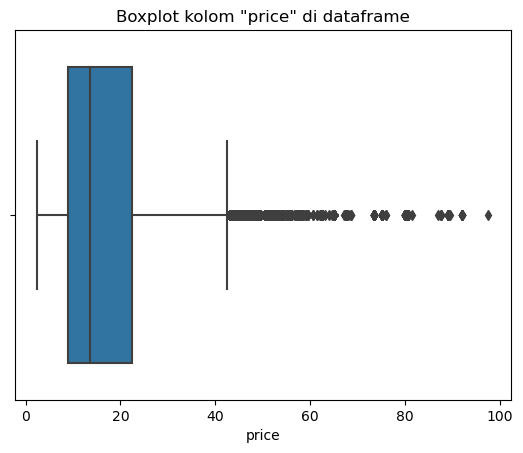

In [17]:
# Visualize the distribution of the ['price' column]
sns.boxplot(x = df['price'])
plt.title('Boxplot kolom "price" di dataframe')
plt.show()

Berdasarkan simetris dari Boxplot ini bisa dinyatakan bahwa data termasuk right skewed dikarenakan nilai tengah/median lebih mendekati Q1 dibandingkan dengan Q3. Setelah visualisasi ini, data bisa dilanjutkan dengan filterisasi menggunakan metode IQR untuk deteksi outlier.

In [18]:
# Outlier detection with IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
# Create the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Call each variables
print(f'Q1 = {Q1}')
print(f'Q3 = {Q3}')
print(f'Lower Bound = {lower_bound}')
print(f'Upper Bound = {upper_bound}')

Q1 = 9.0
Q3 = 22.5
Lower Bound = -11.25
Upper Bound = 42.75


In [19]:
# Filtering the DataFrame without the outlier based on the lower and upper bound
outlier_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
outlier_df.head(5)

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.00,42.34,37.12,Mostly Cloudy,0.00,0.00,0.68,8.66,9.17,10.00,43.68,34.19,37.95,27.39,32.70,1021.98,57,0.72,0,10.00,303.80,0.30,0.13,39.89,43.68,33.73,38.07
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.00,43.58,37.35,Rain,0.13,1.00,0.94,11.98,11.98,4.79,47.30,42.10,43.92,36.20,41.83,1003.97,90,1.00,0,4.79,291.10,0.64,0.13,40.49,47.30,36.20,43.92
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.00,38.33,32.93,Clear,0.00,0.00,0.75,7.33,7.33,10.00,47.55,33.10,44.12,29.11,31.10,992.28,240,0.03,0,10.00,315.70,0.68,0.11,35.36,47.55,31.04,44.12
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.44,1.00,34.38,29.63,Clear,0.00,0.00,0.73,5.28,5.28,10.00,45.03,28.90,38.53,26.20,26.64,1013.73,310,0.00,0,10.00,291.10,0.75,0.00,34.67,45.03,30.30,38.53
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.00,37.44,30.88,Partly Cloudy,0.00,0.00,0.70,9.14,9.14,10.00,42.18,36.71,35.75,30.29,28.61,998.36,303,0.44,0,10.00,347.70,0.72,0.00,33.10,42.18,29.11,35.75


Dari hasil ini terlihat pada index ke 3 dan ke 4 memiliki range 'price' yang cukup jauh dikarenakan perbedaan service yang dipakai (pada kolom name) dimana index ke 3 menggunakan lyft biasa sedangkan index ke 4 menggunakan lyft luxury tipe SUV. Dari hasil diatas maka data akan divisualisasikan kembali berdasarkan kolom 'name'.

In [20]:
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

Dari hasil unique value kolom 'name' diatas maka outlier akan dideteksi dengan menggunakan IQR di setiap value yang ada di kolom 'name'.

In [21]:
def filter_outliers(df, column_name, ride_type_column='name'):
    filtered_df = pd.DataFrame()
    # Loop for each ride_type in the 'name' column
    for ride_type in df[ride_type_column].unique():
        ride_type_data = df[df[ride_type_column] == ride_type]
        # Calculating the IQR
        Q1 = ride_type_data[column_name].quantile(0.25)
        Q3 = ride_type_data[column_name].quantile(0.75)
        IQR = Q3 - Q1

        # Filtering out outliers
        filtered_data = ride_type_data[
            (ride_type_data[column_name] >= (Q1 - 1.5 * IQR)) &
            (ride_type_data[column_name] <= (Q3 + 1.5 * IQR))
        ]

        # Append the filtered data
        filtered_df = pd.concat([filtered_df, filtered_data], axis=0)

    return filtered_df

# Apply the function to filter outliers based on the 'price' column
filtered_df = filter_outliers(df, 'price')

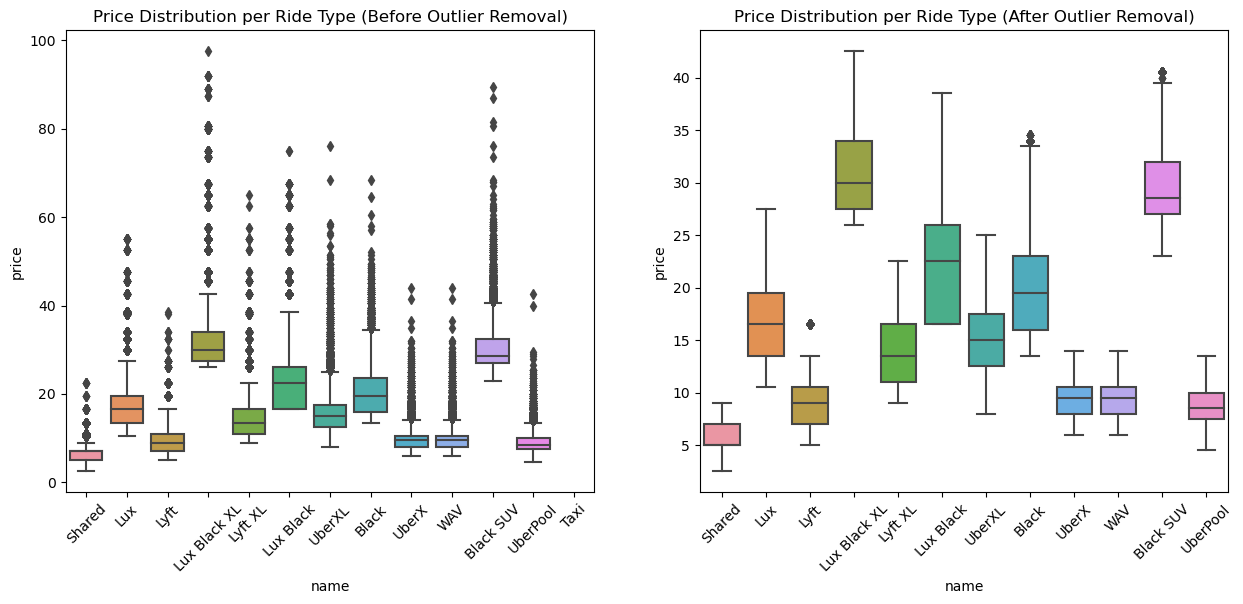

In [22]:
# Visualize the data using boxplots
plt.figure(figsize=(15, 6))

# Visualize before the outlier filtering
plt.subplot(1, 2, 1)
sns.boxplot(x='name', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution per Ride Type (Before Outlier Removal)')

# Visualize after the outlier filtering
plt.subplot(1, 2, 2)
sns.boxplot(x='name', y='price', data=filtered_df)
plt.xticks(rotation=45)
plt.title('Price Distribution per Ride Type (After Outlier Removal)')

plt.show()

Bisa dilihat distribus data jauh lebih bagus setelah setiap outlier tadi dibersihkan. Proses akan dilanjut menggunakan dataframe filtered_df untuk proses duplicates and missing value handling. Lalu diakhiri dengan encoding dan normalisation data.

### d.2 Duplicates and Missing Value Handling

Proses bisa dilanjut dengan menghapus data duplikat dan menghandle nilai kosong (missing values)

In [23]:
filtered_df.shape

(616311, 37)

In [24]:
filtered_df = filtered_df.drop_duplicates()
filtered_df.shape

(560729, 37)

In [25]:
filtered_df.isnull().sum()

hour                       0
day                        0
month                      0
source                     0
destination                0
cab_type                   0
product_id                 0
name                       0
price                      0
distance                   0
surge_multiplier           0
temperature                0
apparentTemperature        0
short_summary              0
precipIntensity            0
precipProbability          0
humidity                   0
windSpeed                  0
windGust                   0
visibility                 0
temperatureHigh            0
temperatureLow             0
apparentTemperatureHigh    0
apparentTemperatureLow     0
dewPoint                   0
pressure                   0
windBearing                0
cloudCover                 0
uvIndex                    0
visibility.1               0
ozone                      0
moonPhase                  0
precipIntensityMax         0
temperatureMin             0
temperatureMax

In [26]:
filtered_df = filtered_df.dropna()

In [27]:
filtered_df.isnull().sum()

hour                       0
day                        0
month                      0
source                     0
destination                0
cab_type                   0
product_id                 0
name                       0
price                      0
distance                   0
surge_multiplier           0
temperature                0
apparentTemperature        0
short_summary              0
precipIntensity            0
precipProbability          0
humidity                   0
windSpeed                  0
windGust                   0
visibility                 0
temperatureHigh            0
temperatureLow             0
apparentTemperatureHigh    0
apparentTemperatureLow     0
dewPoint                   0
pressure                   0
windBearing                0
cloudCover                 0
uvIndex                    0
visibility.1               0
ozone                      0
moonPhase                  0
precipIntensityMax         0
temperatureMin             0
temperatureMax

In [28]:
filtered_df.shape

(560729, 37)

Data duplikat dan data dengan nilai kosong sudah dibersihkan, proses bisa dilanjut dengan Feature Engineering pada data kategorikal

In [29]:
df_categorical = filtered_df.select_dtypes(['object']).columns
df_categorical

Index(['source', 'destination', 'cab_type', 'product_id', 'name',
       'short_summary'],
      dtype='object')

In [30]:
for col in df_categorical:
    print(f'{col} : {filtered_df[col].nunique()} unique values')

source : 12 unique values
destination : 12 unique values
cab_type : 2 unique values
product_id : 12 unique values
name : 12 unique values
short_summary : 9 unique values


kolom datetime akan dibuang di dataframe sekarang. Namun kolom datetime akan digunakan untuk visualisasi data di dataframe baru dengan nama vis_df di bab e.

## e. Explorasi Data

### e1. Query the dataframe

Disini dataframe yang sudah bersih akan dicek value yang ada di statistik deskriptifnya seperti central tendency, mean, quantile, dan lain lain.

In [31]:
filtered_df.describe().T

,count,mean,std,min,25%,50%,75%,max
hour,560729.00,11.61,6.94,0.00,6.00,12.00,18.00,23.00
day,560729.00,17.61,9.98,1.00,13.00,17.00,27.00,30.00
month,560729.00,11.60,0.49,11.00,11.00,12.00,12.00,12.00
price,560729.00,16.27,8.75,2.50,9.00,13.50,22.50,42.50
distance,560729.00,2.14,1.05,0.02,1.28,2.14,2.87,7.86
surge_multiplier,560729.00,1.01,0.07,1.00,1.00,1.00,1.00,2.50
temperature,560729.00,39.57,6.78,18.91,36.45,40.49,43.61,57.22
apparentTemperature,560729.00,35.90,7.98,12.13,31.91,35.97,40.15,57.22
precipIntensity,560729.00,0.01,0.03,0.00,0.00,0.00,0.00,0.14
precipProbability,560729.00,0.15,0.33,0.00,0.00,0.00,0.00,1.00


### e2. Grouping with Datetime Column

Pada tahap ini, kita akan menggunakan kembali data hasil copy df dengan nama vis_df untuk melakukan visualisasi distribusi data sederhana. Dari hasil datetime bisa dilihat bahwa data type masih object, sehingga data ada kemungkinan tidak memiliki format penulisan yang sama. Maka tahap selanjutnya adalah untuk mengubah tipe data object menjadi datetime

In [32]:
vis_df['date'] = pd.to_datetime(vis_df['datetime'], format='%Y/%m/%d %H:%M')
vis_df['date'].head()

0   2018-12-16 09:30:07
1   2018-11-27 02:00:23
2   2018-11-28 01:00:22
3   2018-11-30 04:53:02
4   2018-11-29 03:49:20
Name: date, dtype: datetime64[ns]

Setelah kolom datetime kita format dengan benar, akan dilanjutkan menyusun format datetime untuk memvisualisasikan jumlah perjalanan yang terjadi baik itu per hari maupun per jam dengan melakukan visualisasi data.

In [33]:
#clasiffy ['date'] column into 6 classes in hours 0-3am 4-7 am and so on
def klasifikasi_hour(hour):
    if 0 <= hour <= 3:
        return '0-3am'
    elif 4 <= hour <= 7:
        return '4-7am'
    elif 8 <= hour <= 11:
        return '8-11am'
    elif 12 <= hour <= 15:
        return '12-15pm'
    elif 16 <= hour <= 19:
        return '16-19pm'
    elif 20 <= hour <= 23:
        return '20-23pm' 
    
# Call the funtion and create a new column for it
vis_df['hour_classify'] = vis_df['date'].dt.hour.apply(klasifikasi_hour)

### e3. Visualize data with Datetime column

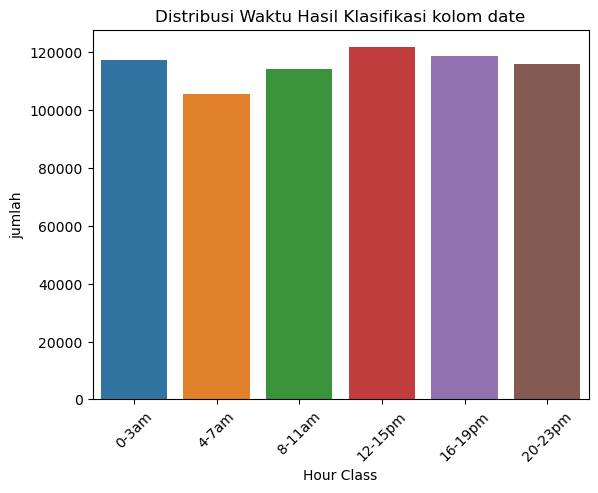

In [34]:
#Plot the classification
sns.countplot(x='hour_classify', data=vis_df, order=['0-3am', '4-7am', '8-11am', '12-15pm', '16-19pm', '20-23pm'])
plt.title('Distribusi Waktu Hasil Klasifikasi kolom date')
plt.xlabel('Hour Class')
plt.ylabel('jumlah')
plt.xticks(rotation=45)
plt.show()

Dari hasil ini bisa disimpulkan bahwa jumlah perjalanan di kelas waktu tertinggi terletak di jam 12-15 siang dengan jumlah perjalanan terendah terletak di jam 4-7 pagi, namun bisa dibilang distribusi data berdasarkan jam tadi bisa dibilang cukup rata. Selain ini, penggambaran jumlah perjalanan (trips) bisa kita lacak dengan hari(day) dari kolom 'date'.

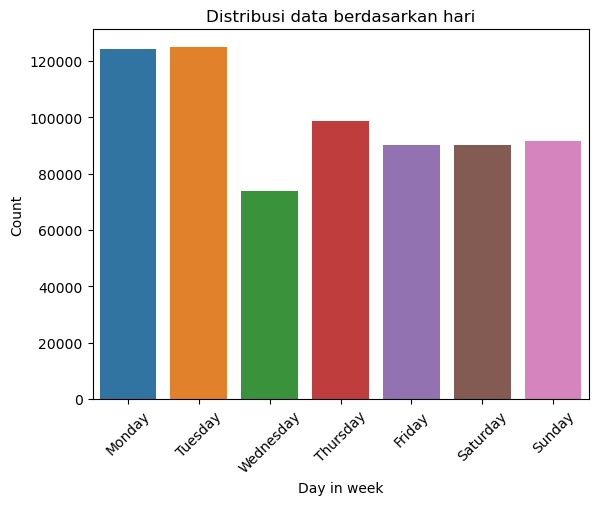

In [35]:
# Classify the day of date of the week
vis_df['day_in_week'] = vis_df['date'].dt.day_name()

# Plot the classification
sns.countplot(x='day_in_week', data=vis_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )
plt.title('Distribusi data berdasarkan hari')
plt.xlabel('Day in week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Dari hasil countplot ini bisa disimpulkan bahwa peak trips/perjalanan yang ada di dataset ini berada di hari senin dan selasa. Dengan jumlah perjalanan paling sedikit terletak di hari rabu.

## f. Data Preprocessing

Disini data akan diproses terlebih dahulu sebelum dilakukan proses pelatihan data menggunakan algoritma. Ada 3 tahap yang akan dilakukan sebelum spliting data training dan testing disini yaitu correlation check, column encoding (dari data object ke numerical), lalu diakhiri dengan data normalization. Setelah tahap-tahap itu dijalankan barulah bisa diakhiri dengan data splitting.

### f.1 Correlation

Analisis korelasi adalah suatu cara atau metode untuk mengetahui ada atau tidaknya hubungan linear antara variabel. Disini analisis korelasi digunakan untuk melihat hubungan antar kolom yang ada di dataframe.

C:\Users\vince\AppData\Local\Temp\ipykernel_15316\1621546959.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_df.corr().abs())


<Axes: >

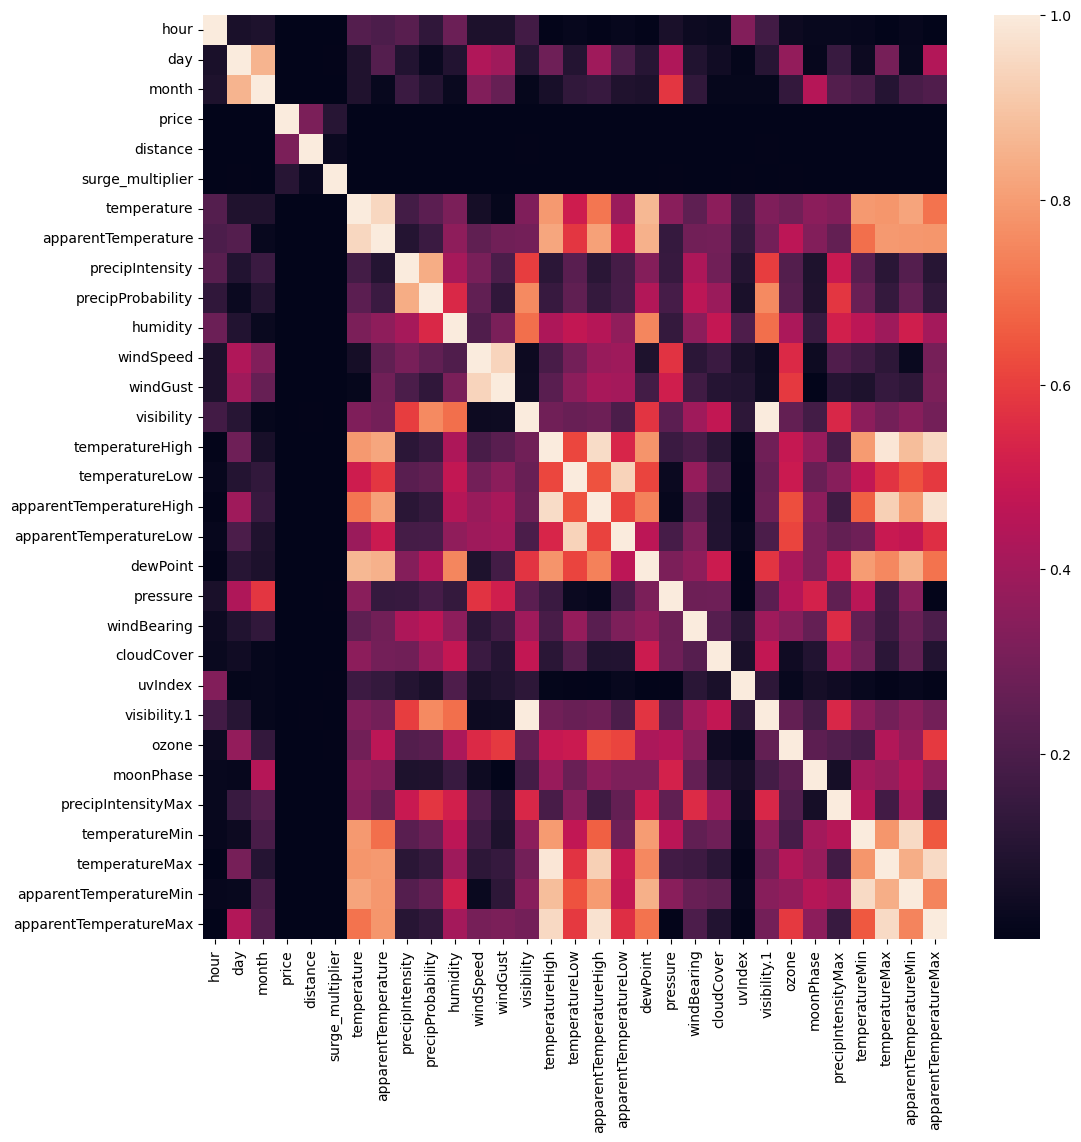

In [36]:
# Visualize each correlation on the dataframe columns
plt.figure(figsize=(12,12))
sns.heatmap(filtered_df.corr().abs())

Bisa dilihat dari hasil korelasi tersebut bisa dibilang ada beberapa kolom yang memiliki heat color yang mirip. Hal ini bisa menyebabkan redudansi data, oleh karena itu kolom tersebut akan difilter menggunakan threshold lalu kolom tersebut akan dibuang sehingga membuat dataframe mempunyai data yang lebih bersih.

In [37]:
# Drop the column that had a high threshord to reduce redundancy
threshold = 0.9
corr_matrix = filtered_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))
to_drop

C:\Users\vince\AppData\Local\Temp\ipykernel_15316\3740120887.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = filtered_df.corr().abs()


There are 8 columns to remove.


['apparentTemperature',
 'windGust',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'visibility.1',
 'temperatureMax',
 'apparentTemperatureMin',
 'apparentTemperatureMax']

In [38]:
# Declaere new df where it'll drop the irrelevant column based on the correlation
filtered_df = filtered_df.drop(to_drop, axis=1)

C:\Users\vince\AppData\Local\Temp\ipykernel_15316\1628863600.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_df.corr().abs())


<Axes: title={'center': 'New column correlation'}>

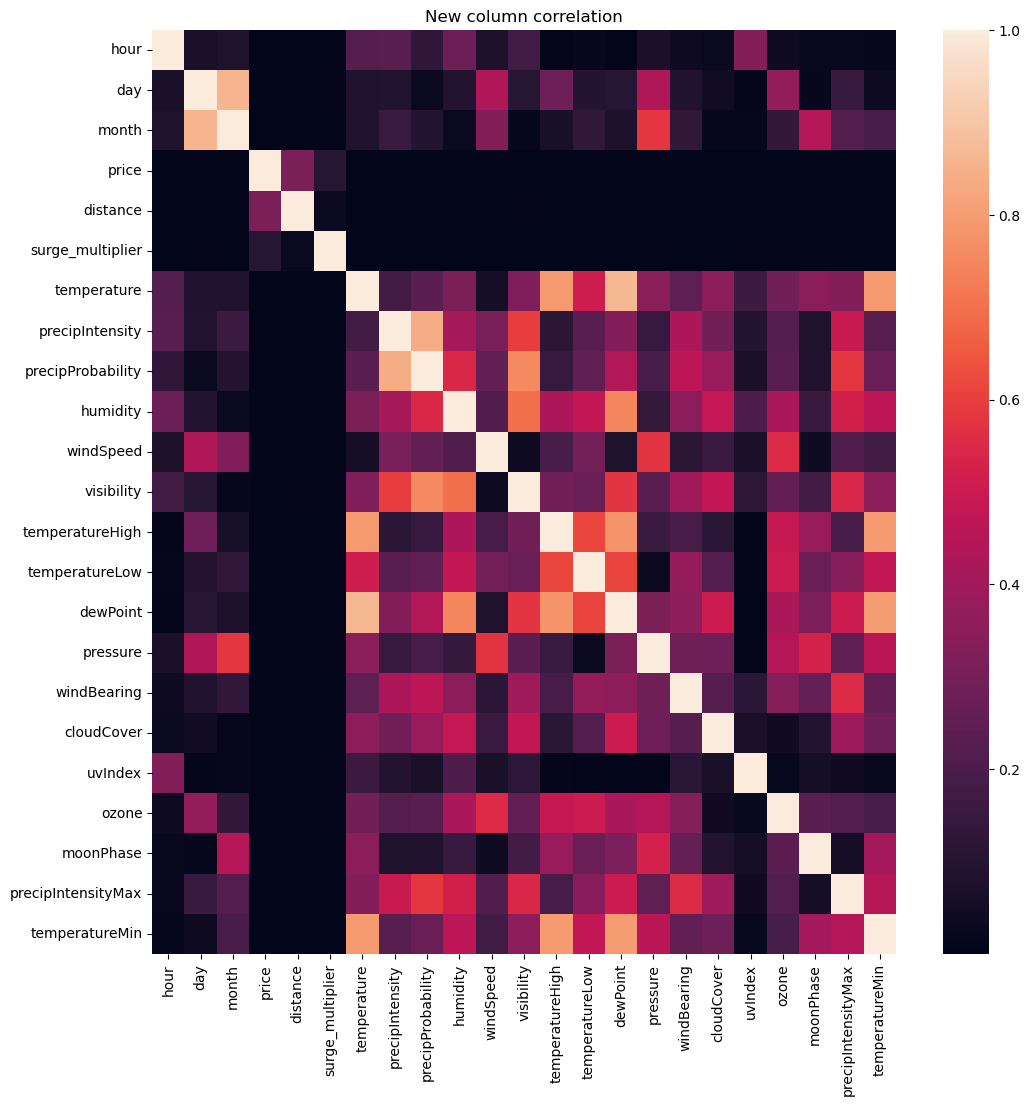

In [39]:
# Visualize the new correlation
plt.figure(figsize=(12,12))
plt.title('New column correlation')
sns.heatmap(filtered_df.corr().abs())

Dari hasil diatas bisa dinyatakan bahwa visualisasi data korelasi sudah bisa dinyatakan bersih dimana garis diagonal saja yang memiliki heat color yang sama.

### f.2 Column Encoding

Di proses encoding in, data type akan disesuaikan dengan algoritma yang akan digunakan untuk Machine Learning. Pada metode linear regression, data type sendiri harus bernilai numeric (float atau int). Maka dari itu data type categorical (object) akan dikumpulkan dan diencode menjadi data numerical sebelum data tersebut dilatih menggunakan linear regression.

In [40]:
# Filter the dataframe based on the categorical data types
df_categorical = filtered_df.select_dtypes('object').columns
df_categorical

Index(['source', 'destination', 'cab_type', 'product_id', 'name',
       'short_summary'],
      dtype='object')

In [41]:
# Filter dataframe based on the numerical data types
df_numerical = filtered_df.select_dtypes(["float64","int64"]).columns
df_numerical

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'temperature', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'visibility', 'temperatureHigh', 'temperatureLow',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'moonPhase', 'precipIntensityMax', 'temperatureMin'],
      dtype='object')

In [42]:
# Check the categorical dataframe number of unique
for col in df_categorical:
    print(f'{col} : {filtered_df[col].nunique()} unique values')

source : 12 unique values
destination : 12 unique values
cab_type : 2 unique values
product_id : 12 unique values
name : 12 unique values
short_summary : 9 unique values


Kolom yang sudah dikelompokkan di atas memiliki tipe data 'object' disini data tersebut akan diencode dan disimpan ke variabel baru bernama encoded_df

In [43]:
encoded_df = filtered_df[df_categorical]
not_encoded_df = filtered_df[df_numerical]

In [44]:
encoded_df = pd.get_dummies(encoded_df).astype('int')
df = pd.concat([not_encoded_df, encoded_df], axis = 1)
df.sample(3)

,hour,day,month,price,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,visibility,temperatureHigh,temperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
88932,4,17,12,22.50,2.13,1.25,40.08,0.02,1.00,0.90,10.45,2.58,43.68,34.19,37.36,1007.02,41,1.00,0,328.10,0.30,0.13,39.89,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
25759,18,29,11,13.50,1.53,1.00,43.65,0.00,0.00,0.52,12.55,9.92,45.03,28.90,27.12,1006.54,312,0.35,1,313.50,0.75,0.00,34.67,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
360849,7,13,12,7.00,2.68,1.00,18.91,0.00,0.00,0.59,3.16,10.00,33.51,26.51,7.06,1029.29,353,0.08,0,326.10,0.21,0.00,18.11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### f.3 Data Normalization

Data Normalization adalah metode yang digunakan untuk mengubah nilai kolom numerik dalam dataset ke skala umum, tanpa mengubah perbedaan dalam rentang nilai. Metode yang akan digunakan disini adalah Robust Scaler dimana pendekatan ini  akan menggunakan median dan kuartil value untuk mengukur pusat dan penyebaran data, sehingga membuat metode ini lebih tahan (robust) terhadap pencilan dibandingkan dengan pendekatan normalisasi lainnya.

In [45]:
# Call the RobustScaler
scaler = RobustScaler()

# Fit the scaler on your data and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame for easier analysis (optional)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [46]:
# Call the new scaled_df dataferame
scaled_df.head()

,hour,day,month,price,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,visibility,temperatureHigh,temperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,-0.25,-0.07,0.00,-0.63,-1.07,0.00,0.26,0.00,0.00,-0.12,0.56,0.07,-0.23,0.01,0.17,0.55,-1.12,-0.17,0.00,-0.05,-0.78,1.39,0.56,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,-0.50,-1.00,0.00,-0.78,-0.67,0.00,0.71,0.00,0.00,1.04,-0.93,-5.07,2.80,-0.04,1.27,-0.40,0.28,0.27,0.00,-0.37,0.43,0.00,0.88,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2,-0.83,0.93,-1.00,-0.74,-0.89,0.00,-0.47,0.00,0.00,-0.17,0.16,0.06,-0.00,-0.55,-0.34,0.09,0.34,-1.27,0.00,-0.22,0.14,-0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,-0.75,0.71,-1.00,-0.74,0.69,0.00,0.45,0.11,1.00,0.75,1.06,-3.22,0.41,0.78,0.93,-0.37,-0.99,0.27,0.00,-0.38,-0.08,1.33,0.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,-0.17,0.79,-1.00,-0.63,-0.24,0.00,-0.85,0.00,0.00,0.29,-0.20,0.01,-0.47,0.33,-0.23,-0.85,0.01,-0.56,0.00,0.97,0.08,-0.00,-0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [47]:
# save the clean data to .pkl format
scaled_df.to_pickle('scaled_df.pkl')


### f.4 Data Splitting (Train test)

Setelah dataframe scaled_df diproses secara baik, proses akan dilanjutkan dengan membagi baris dataframe menjadi data train dan data test. Sebelum membagi baris tersebut akan ditetapkan terlebih dahulu kolom mana yang akan digunakan sebagai label. Disini kolom 'price' akan digunakan sebagai label prediksi linear regression.

In [48]:
# Declare the column that want to be labeled/predict
X = scaled_df.drop(columns='price')
y = scaled_df['price']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## g. Define the model

Dalam final project ini, kami memilih Linear Regression sebagai model utama sesuai dengan tujuan proyek. Alasan pemilihan Linear Regression selain dari persyaratan penilaian final project ini adalah karena model ini sangat sesuai untuk mencapai tujuan utama final project, yaitu memprediksi harga layanan Rideshare berdasarkan kolom dataset yang kami miliki yaitu 'price'. Linear Regression efektif untuk memodelkan hubungan linear antara satu atau lebih variabel bebas (feature) dan variabel terikat (target), yang sangat cocok dengan karakteristik dataset kami. Oleh karena itu, Linear Regression menjadi pilihan utama dalam proyek ini.

Salah satu keunggulan dari Linear Regression adalah bahwa model ini tidak memerlukan pemilihan hyperparameter khusus. Meskipun terdapat parameter yang dapat diatur untuk mengoptimalkan model, Linear Regression umumnya tidak membutuhkan penyesuaian parameter intensif seperti pada algoritma yang lebih kompleks. Ini menjadikannya pilihan yang tepat dan efisien untuk proyek kami.

In [50]:
# Define the Linear Regression Model
lr = LinearRegression()

## h. Training Model

Training/pelatihan model akan dilakukan oleh variabel lr yang sudah dideklarasikan sebelumnya dengan menggunakan veriabel bebas berupa X_train dan variabel target berupa y_train

In [51]:
lr.fit(X_train, y_train)

LinearRegression()

## i. Evaluate the model

Mean Squared Error (MSE) adalah metrik evaluasi yang umum digunakan dalam statistik dan machine learning untuk mengukur seberapa akurat sebuah model regresi dalam memprediksi nilai numerik. MSE menghitung selisih antara nilai prediksi model dan nilai sebenarnya dari data, kemudian mengkuadratkan selisih tersebut agar tidak ada selisih yang bernilai negatif. Kemudian, selisih kuadrat dijumlahkan dan diambil rata-rata dari semua sampel data.  
Disini model training akan dievaluasi peformanya menggunakan MSE(Mean Squared Error) dengan data test yang sudah dideklarasikan sebelumnya yang memiliki bobot sebanyak 20% dari total dataframe.

In [52]:
# Predict the test value using the the trained data
y_pred = lr.predict(X_test)

In [53]:
# Define an MSE then show the results for the model predict results
mse_test = mean_squared_error(y_test, y_pred)
print(f'The MSE(Mean Squared Error) for this model is {mse_test} note: lower is better')

The MSE(Mean Squared Error) for this model is 0.02348188541849746 note: lower is better


Setelah dikalkulasi hasil MSE, tahap selanjutnya adalah untu melakukan visualisasi hasil data yang sudah diprediksi diatas menggunakan plot scatter untuk melihat distribusi data

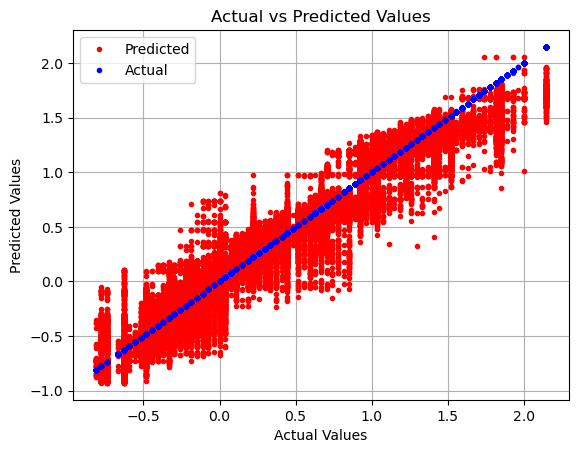

In [54]:
#Visualizeing the Actual vs Predicted Values
plt.plot(y_test, y_pred, 'r.', label='Predicted')
plt.plot(y_test, y_test, 'b.', label='Actual')
plt.xlabel('Actual Values');
plt.ylabel('Predicted Values');
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

In [55]:
# Save the model
joblib.dump(lr, 'lrmodel.pkl')

['lrmodel.pkl']

## j. Inference the model

### j.1 Data Manipulation for Model Inference

Cobalah mengambil sampel data dari X_train

In [56]:
X_train.sample()

,hour,day,month,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,visibility,temperatureHigh,temperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
64052,-0.50,-1.14,0.00,-0.27,0.00,-0.82,0.00,0.00,0.29,-0.56,0.04,-0.00,0.09,-0.23,0.43,0.22,0.17,0.00,-0.46,0.29,-0.00,-0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


Pakailah file .pkl yang sudah dibuat sebelumnya lalu acak isi dataframe tersebut untuk diambil barisnya untuk menguji prediksi model

In [63]:
# Load the previous scaled_df data to predict
predict_df = pd.read_pickle('scaled_df.pkl')
# Randomize the data using np shuffle
randomized_data = predict_df.copy()
for column in randomized_data.columns:
    np.random.shuffle(randomized_data[column].values)

# Drop the labeled data
print('Data is already randomized :')
randomized_data.head()

Data is already randomized :


,hour,day,month,price,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,visibility,temperatureHigh,temperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,0.75,-0.29,0.00,0.67,0.02,0.00,-0.48,0.13,1.00,-0.50,0.29,-0.02,-2.47,-0.03,1.18,-0.37,0.22,-0.46,0.00,-0.57,-0.08,-0.00,-0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.58,0.79,0.00,0.11,-0.55,0.00,0.94,0.01,0.00,-0.54,-0.71,-0.06,-0.49,0.48,-2.47,-0.37,0.15,0.27,1.00,-0.91,0.08,-0.00,-1.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
2,0.83,0.93,0.00,0.93,-0.38,0.00,-0.04,0.01,0.00,-0.21,0.45,-4.10,-2.73,-0.69,1.10,-0.43,0.30,-0.10,1.00,1.46,0.37,-0.00,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
3,0.25,-0.07,0.00,1.48,-0.52,0.00,-0.49,0.00,0.00,0.83,-0.75,-3.98,-2.69,-0.70,1.42,-0.83,-0.25,0.27,1.00,0.54,-0.08,0.19,0.09,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
4,0.67,0.71,0.00,1.04,0.74,0.00,-0.19,0.00,0.00,-0.25,-0.13,0.05,-0.04,-0.05,0.13,0.96,-1.07,-0.78,0.00,-0.29,-1.20,0.19,-0.05,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [64]:
# Pick 1 row from the randomized data
num_of_samples = 1
inference_data = randomized_data.sample(num_of_samples, random_state=42)

# menghapus kolom price karena itu adalah target
inference_data = inference_data.drop(columns=['price'])

# Tampilkan data inference
print(f"Data Inference: ")
inference_data

Data Inference: 


,hour,day,month,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,visibility,temperatureHigh,temperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
451,0.58,0.86,0.00,-0.11,0.00,0.19,0.00,1.00,-0.29,0.47,0.07,-2.44,-0.05,-1.14,0.02,-0.28,0.14,0.00,0.64,-0.71,1.16,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


Disini variabel yang akan digunakan untuk prediksi hanya 1 baris saja. Untuk menambahkan prediksi yang lebih jauh bisa menggunakan variabel num_of_samples.

### j.2 Interference Model Predicting Test

Disini model dicoba untuk memprediksi hasil dari data interference yang sudah dideclare sebelumnya

In [65]:
# Predict the inference_data
y_pred_inference = lr.predict(inference_data)

# Show the results
print(f'Inference Prediction from the sample data is : {y_pred_inference}')

Inference Prediction from the sample data is : [7.89159537e+10]


## i. Hypothesis/Kesimpulan

Berikut adalah kegiatan yang sudah dilakukan dari pengerjaan final project 1 :
 - Memahami data cleaning dengan mempersiapkan data sebelum data tersebut dimodel menggunakan algoritma machine learning.
 - Telah memvisualisasikan dataframe sesuai dengan konteks yang digunakan
 - Dapat mengimplement algoritma Linear Regression untuk membuat prediksi di kolom Price



Berikut adalah kesimpulan dari pengerjaan final project 1: 

- Kelompok 9 dari kelas KS18 telah berhasil dalam mengimplement konsep machine learning linear regression. Model ini digunakan untuk menggambarkan hubungan linier antara satu atau lebih *independent variables (features)* dan *dependent variables (target)* dengan kolom prediksi 'price'. Hasil yang didapatkan berupa nilai *Mean Squared Error (MSE)* : 0.02348188541849746
- Kelompok 9 ini juga sudah berhasil dalam mempersiapkan data sebelum diproses menggunakan *machine learning* yaitu denagn melakukan *data cleaning, dan data preprocessing* di kolom kolom yang ada di dataframe *Uber Lyft Boston*. Kolom-kolom yang dipakai untuk pe*model*an *machine learning* akan dicantumkan di akhir kesimpulan.
- Kelompok 9 juga sudah berhasil dalam memvisualisasikan data menggunakan *library seaborn dan pyplot* untuk melihat korelasi antar kolom, statistik data, serta penyebaran data setelah prediksi *machine learning* dibuat.

Berikut adalah lampiran data berupa coef, intercept dan column yang digunakan:

In [69]:
lr.coef_

array([-5.62818642e-04, -2.65138447e-03, -3.05773480e-03,  3.26363323e-01,
        9.07980316e-01, -3.33882031e-03,  4.87700990e-02,  3.98676517e-03,
       -6.87812975e-03, -6.46100412e-04, -1.03309556e-04, -1.47058646e-03,
        1.50653957e-03,  6.00093010e-03, -2.25179293e-03,  1.11202835e-03,
       -3.00598843e-03, -9.00077752e-04, -6.63528306e-04, -3.87670430e-03,
       -7.82946987e-04,  2.44114790e-03, -4.68060189e+10, -4.68060189e+10,
       -7.12373771e+10, -7.12373771e+10, -4.68060189e+10, -7.12373771e+10,
       -7.12373771e+10, -4.68060189e+10, -7.12373771e+10, -7.12373771e+10,
       -4.68060189e+10, -4.68060189e+10,  6.32976588e+10,  6.32976588e+10,
        3.88663006e+10,  3.88663006e+10,  6.32976588e+10,  3.88663006e+10,
        3.88663006e+10,  6.32976588e+10,  3.88663006e+10,  3.88663006e+10,
        6.32976588e+10,  6.32976588e+10,  2.30358439e+11, -3.92000154e+10,
        1.42386360e+11,  3.06161552e+11,  5.44211529e+10,  2.18572453e+11,
        7.09616878e+10,  

In [70]:
lr.intercept_

14822890604.6119

In [68]:
X_train.columns

Index(['hour', 'day', 'month', 'distance', 'surge_multiplier', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'visibility', 'temperatureHigh', 'temperatureLow', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'moonPhase', 'precipIntensityMax', 'temperatureMin', 'source_Back Bay',
       'source_Beacon Hill', 'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station'